In [16]:
import numpy as np         #numpy is used for most of the mathematical (as np ables us to use it as a shortcut)
import matplotlib.pyplot as plt     # for charts and graphs
import pandas as pd

dataset = pd.read_csv('/kaggle/input/predicting-hiring-decisions-in-recruitment-data/recruitment_data.csv')   

dataset.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [17]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)
    
    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()
    
    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")
        
    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())
    
    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())
    
    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n", df.describe().transpose())

# Call the function
get_df_info(dataset)


Shape of DataFrame:  (1500, 11)

Columns in DataFrame:  ['Age', 'Gender', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'RecruitmentStrategy', 'HiringDecision']

Data types of columns:
 Age                      int64
Gender                   int64
EducationLevel           int64
ExperienceYears          int64
PreviousCompanies        int64
DistanceFromCompany    float64
InterviewScore           int64
SkillScore               int64
PersonalityScore         int64
RecruitmentStrategy      int64
HiringDecision           int64
dtype: object

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'EducationLevel'}>],
       [<Axes: title={'center': 'ExperienceYears'}>,
        <Axes: title={'center': 'PreviousCompanies'}>,
        <Axes: title={'center': 'DistanceFromCompany'}>],
       [<Axes: title={'center': 'InterviewScore'}>,
        <Axes: title={'center': 'SkillScore'}>,
        <Axes: title={'center': 'PersonalityScore'}>],
       [<Axes: title={'center': 'RecruitmentStrategy'}>,
        <Axes: title={'center': 'HiringDecision'}>, <Axes: >]],
      dtype=object)

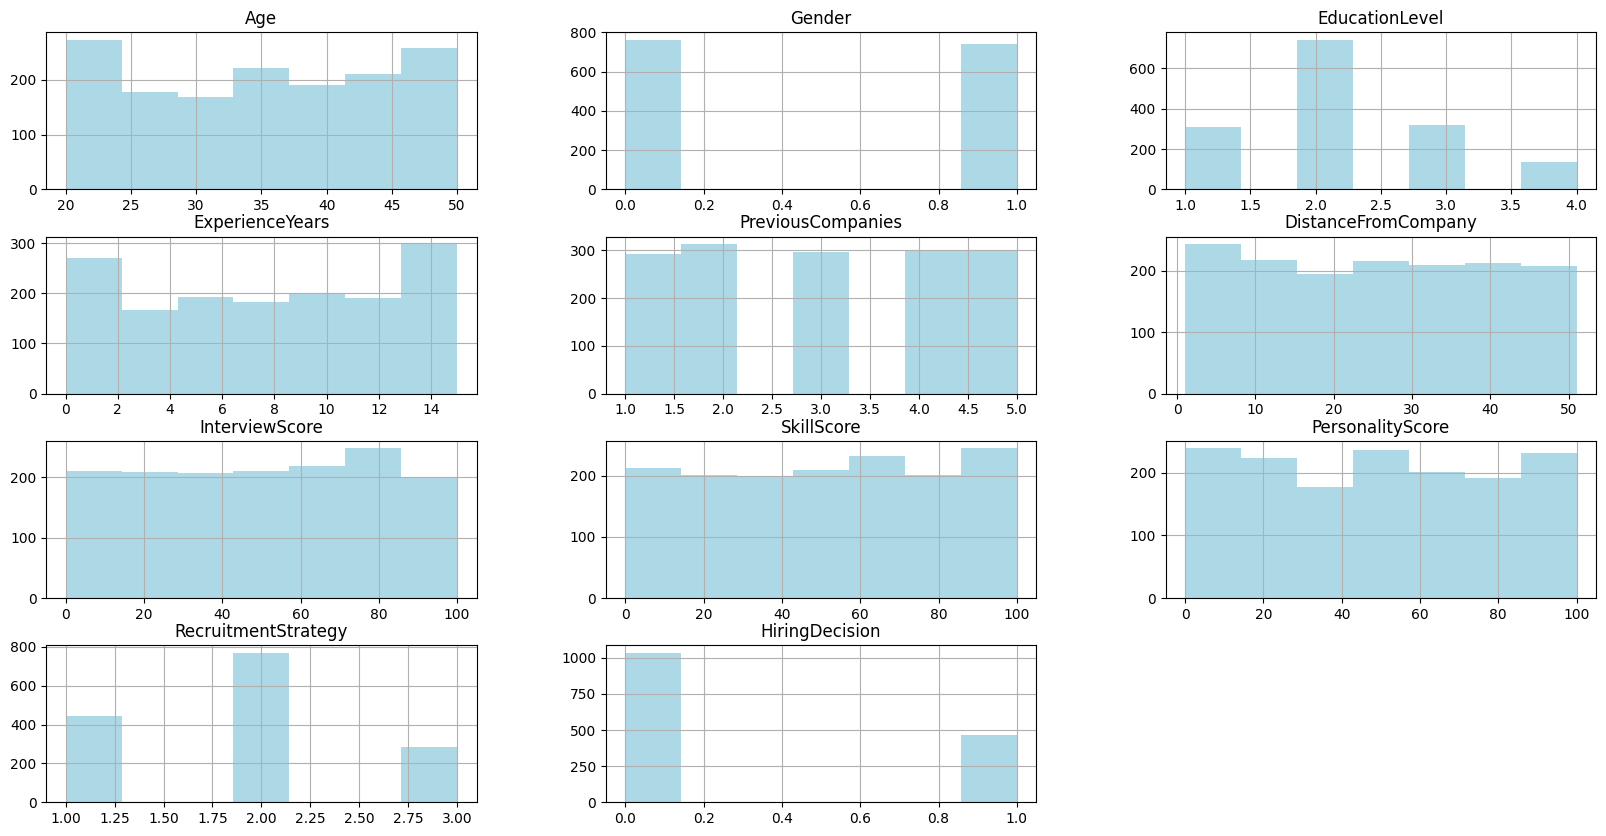

In [18]:
dataset.hist(figsize=(20,10),bins=7, color='lightblue')

In [19]:
X=dataset.drop('HiringDecision',axis=1)
y=dataset['HiringDecision']
X.head()


,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
0,26,1,2,0,3,26.783828,48,78,91,1
1,39,1,4,12,3,25.862694,35,68,80,2
2,48,0,2,3,2,9.920805,20,67,13,2
3,34,1,2,5,2,6.407751,36,27,70,3
4,30,0,1,6,1,43.105343,23,52,85,2


In [20]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: HiringDecision, dtype: int64

In [21]:
X=X.iloc[:,:].values
print(X)

[[26.  1.  2. ... 78. 91.  1.]
 [39.  1.  4. ... 68. 80.  2.]
 [48.  0.  2. ... 67. 13.  2.]
 ...
 [24.  1.  1. ... 91. 58.  1.]
 [48.  0.  2. ... 37. 44.  2.]
 [34.  1.  2. ... 40. 26.  2.]]


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
column = X[:,9].reshape(-1, 1)
onehotencoder =OneHotEncoder()    
# inside brackets specifies that first column needs to be labeled
efc= onehotencoder.fit_transform(column).toarray()
X = np.hstack((X[:, 0:9], efc[:,1:])) #dummy variable removed


In [ ]:
print(X[:3,:])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size= 0.2, random_state=0)





In [ ]:



from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [26]:
pip install scikeras


^C
Note: you may need to restart the kernel to use updated packages.


In [27]:
'''import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Function to build the ANN model
def build_classifier(optimizer='adam', units=5, dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(units=units, kernel_initializer='uniform', activation='relu', input_dim=11))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())

    model.add(Dense(units=units, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())

    model.add(Dense(units=units, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())

    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model so it can be used by scikit-learn
classifier = KerasClassifier(
    model=build_classifier, 
    verbose=0
)

# Define the grid of hyperparameters to search
param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],
    'model__units': [5, 10, 15],
    'model__dropout_rate': [0.3, 0.4, 0.5],
    'batch_size': [10, 20, 30],
    'epochs': [100, 150, 200]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
'''

'import keras\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Dropout, BatchNormalization\nfrom scikeras.wrappers import KerasClassifier\nfrom sklearn.model_selection import GridSearchCV\n\n# Function to build the ANN model\ndef build_classifier(optimizer=\'adam\', units=5, dropout_rate=0.3):\n    model = Sequential()\n    model.add(Dense(units=units, kernel_initializer=\'uniform\', activation=\'relu\', input_dim=11))\n    model.add(Dropout(dropout_rate))\n    model.add(BatchNormalization())\n\n    model.add(Dense(units=units, kernel_initializer=\'uniform\', activation=\'relu\'))\n    model.add(Dropout(dropout_rate))\n    model.add(BatchNormalization())\n\n    model.add(Dense(units=units, kernel_initializer=\'uniform\', activation=\'relu\'))\n    model.add(Dropout(dropout_rate))\n    model.add(BatchNormalization())\n\n    model.add(Dense(units=1, kernel_initializer=\'uniform\', activation=\'sigmoid\'))\n    model.compile(optimizer=optimizer, loss=\'binary_crossent

In [28]:
# buildinf the ANN
import keras
from keras.models import Sequential

from keras.layers import Dense, Dropout, BatchNormalization


#intitialize ANN
classifier = Sequential()

# maiking the first hidden layer
classifier.add(Dense(units= 5, kernel_initializer = 'uniform', activation= 'relu', input_dim=11))
classifier.add(Dropout(0.3))
classifier.add(BatchNormalization())

# adding second layer
classifier.add(Dense(units= 5, kernel_initializer = 'uniform', activation= 'relu'))
classifier.add(Dropout(0.3))
classifier.add(BatchNormalization())


# adding second layer
classifier.add(Dense(units= 5, kernel_initializer = 'uniform', activation= 'relu'))
classifier.add(Dropout(0.3))
classifier.add(BatchNormalization())



#adding the output layer
classifier.add(Dense(units= 1, kernel_initializer = 'uniform', activation= 'sigmoid'))

#compiling sll the layers
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


#fitting into train set
classifier.fit(X_train,y_train,batch_size=10, epochs= 150,validation_split=0.15)


Epoch 1/150


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6008 - loss: 0.6862 - val_accuracy: 0.7278 - val_loss: 0.6696
Epoch 2/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7470 - loss: 0.6286 - val_accuracy: 0.7278 - val_loss: 0.6351
Epoch 3/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7811 - loss: 0.5513 - val_accuracy: 0.7278 - val_loss: 0.5744
Epoch 4/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8039 - loss: 0.4916 - val_accuracy: 0.7722 - val_loss: 0.4937
Epoch 5/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8106 - loss: 0.4809 - val_accuracy: 0.8333 - val_loss: 0.4300
Epoch 6/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8053 - loss: 0.4669 - val_accuracy: 0.8778 - val_loss: 0.3732
Epoch 7/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8011 - loss: 0.4624 - val_accuracy: 0.8389 - val_loss: 0.3723
Epoch 8/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7856 - loss: 0.4896 - val_accuracy: 0.8444

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[202   9]
 [ 37  52]]


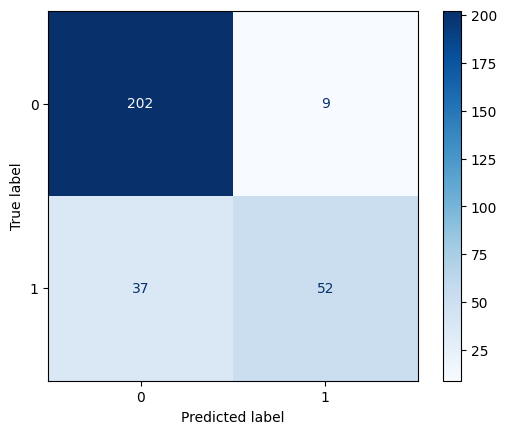

In [32]:
y_pred = classifier.predict(X_test)
y_pred=y_pred>0.5


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_pred)

print(cm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()